Тестовое задание для кандидатов в команду поиска

1.	Используя предоставленный датасет провести разведывательный анализ данных.
2.	Аргументированно выбрать поля, которые будут использоваться для поиска вакансий соискателями.
3.	Составить план эксперимента по расчету релевантности выдачи поисковой системы.


## Разведывательный анализ данных

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Загрузим данные
df = pd.read_csv('test_task_in_search.csv')

In [3]:
# Выведем первые 5 строк
df.head()

,vacancy_id,vacancy_custom_position,vacancy_operating_schedule_id,vacancy_salary_from,vacancy_salary_to,vacancy_description,vacancy_offer_education_id,vacancy_offer_experience_year_count,vacany_company_id,vacancy_is_agency,vacancy_city_id,vacancy_operating_schedule_comment,vacancy_offer_experience_year_id
0,33960307,Кассир (ночная смена),1,0,60000.0,<strong>Требования:</strong><br />\r\n<ul>\r\n...,0,NaN,697552,False,1,NaN,0.0
1,42555753,Пеший курьер (частичная занятость),1,35000,45000.0,"<strong>Мы ускоряемся, а значит &ndash; ты най...",0,NaN,1496644,False,17,NaN,NaN
2,43354939,Программист шаблонизатора Liquid и Битрикс,6,40000,NaN,"В связи с расширением, ищем талантливых и умны...",4,2.0,2046242,False,1,NaN,NaN
3,42561957,Грузчик-упаковщик,7,46000,48000.0,<strong>Комплектовщик</strong><br /> &nbsp;Ком...,0,-100.0,1682041,False,3,NaN,NaN
4,43792934,Курьер,1,80000,NaN,<strong>Обязанности:</strong><br /> Доставка и...,0,-100.0,2254926,False,1,NaN,NaN


In [4]:
# Выведем общую информащию по таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134000 entries, 0 to 133999
Data columns (total 13 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   vacancy_id                           134000 non-null  int64  
 1   vacancy_custom_position              134000 non-null  object 
 2   vacancy_operating_schedule_id        134000 non-null  int64  
 3   vacancy_salary_from                  134000 non-null  int64  
 4   vacancy_salary_to                    89729 non-null   float64
 5   vacancy_description                  134000 non-null  object 
 6   vacancy_offer_education_id           134000 non-null  int64  
 7   vacancy_offer_experience_year_count  122464 non-null  float64
 8   vacany_company_id                    134000 non-null  int64  
 9   vacancy_is_agency                    134000 non-null  bool   
 10  vacancy_city_id                      134000 non-null  int64  
 11  vacancy_opera

In [5]:
# Проверим количество полных дубликатов
df.duplicated().sum()

44964

In [6]:
# Выведем на экран несколько полных дубликатов
df[df.duplicated(keep=False)].sort_values('vacancy_id').head(15)

,vacancy_id,vacancy_custom_position,vacancy_operating_schedule_id,vacancy_salary_from,vacancy_salary_to,vacancy_description,vacancy_offer_education_id,vacancy_offer_experience_year_count,vacany_company_id,vacancy_is_agency,vacancy_city_id,vacancy_operating_schedule_comment,vacancy_offer_experience_year_id
7569,6503425,Электросварщик металлоконструкций,1,50000,60000.0,<strong>Требования:</strong><br /><br />Опыт р...,2,2.0,102402,False,1,NaN,3.0
66630,6503425,Электросварщик металлоконструкций,1,50000,60000.0,<strong>Требования:</strong><br /><br />Опыт р...,2,2.0,102402,False,1,NaN,3.0
753,6503425,Электросварщик металлоконструкций,1,50000,60000.0,<strong>Требования:</strong><br /><br />Опыт р...,2,2.0,102402,False,1,NaN,3.0
41055,6503425,Электросварщик металлоконструкций,1,50000,60000.0,<strong>Требования:</strong><br /><br />Опыт р...,2,2.0,102402,False,1,NaN,3.0
59039,8612249,Бухгалтер,1,49000,49000.0,<strong>Требования:</strong><br />\r\n<ul>\r\n...,4,3.0,33368,False,1,NaN,3.0
89109,8612249,Бухгалтер,1,49000,49000.0,<strong>Требования:</strong><br />\r\n<ul>\r\n...,4,3.0,33368,False,1,NaN,3.0
38991,8612249,Бухгалтер,1,49000,49000.0,<strong>Требования:</strong><br />\r\n<ul>\r\n...,4,3.0,33368,False,1,NaN,3.0
34027,9379181,Инженер-конструктор,1,60000,NaN,<br /> <strong>Требования:</strong><br />\r\n<...,4,3.0,44478,False,1,NaN,5.0
75717,9379181,Инженер-конструктор,1,60000,NaN,<br /> <strong>Требования:</strong><br />\r\n<...,4,3.0,44478,False,1,NaN,5.0
128502,21024482,Вахтер,3,18000,NaN,В производственно-научную фирму на постоянную ...,0,-100.0,44478,False,1,NaN,0.0


In [7]:
# Посчитаем количество пропущенных данных
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
vacancy_operating_schedule_comment,133269,0.994545
vacancy_offer_experience_year_id,129446,0.966015
vacancy_salary_to,44271,0.330381
vacancy_offer_experience_year_count,11536,0.086090
vacancy_id,0,0.000000
vacancy_custom_position,0,0.000000
vacancy_operating_schedule_id,0,0.000000
vacancy_salary_from,0,0.000000
vacancy_description,0,0.000000
vacancy_offer_education_id,0,0.000000


<AxesSubplot:>

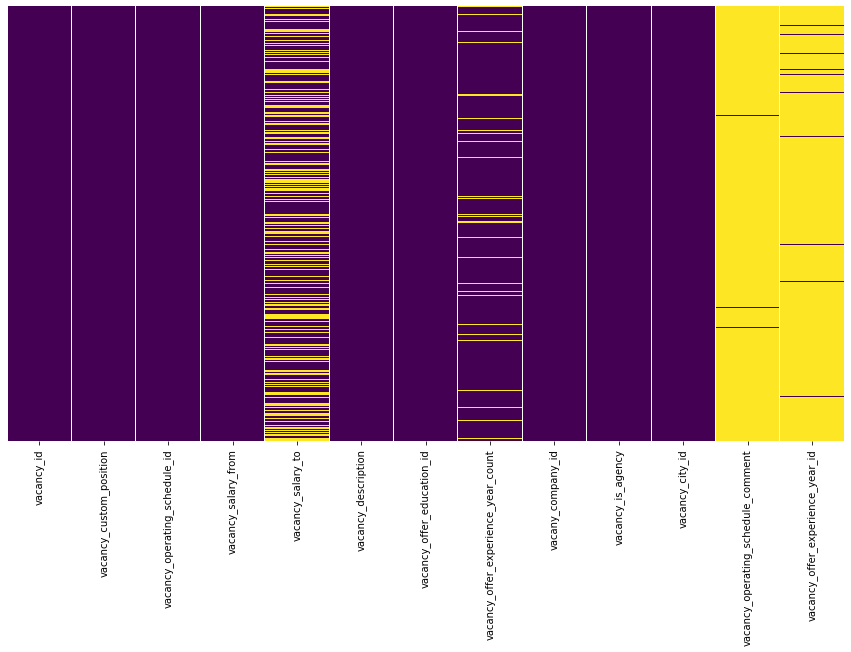

In [8]:
# Визуализируем пропуски
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
print('Количество уникальных значений для столбцов')
for column in df.columns:
    print(f'"{column}" = {df[column].nunique()}')

Количество уникальных значений для столбцов
"vacancy_id" = 89036
"vacancy_custom_position" = 23159
"vacancy_operating_schedule_id" = 6
"vacancy_salary_from" = 1541
"vacancy_salary_to" = 1362
"vacancy_description" = 72857
"vacancy_offer_education_id" = 5
"vacancy_offer_experience_year_count" = 13
"vacany_company_id" = 19158
"vacancy_is_agency" = 2
"vacancy_city_id" = 68
"vacancy_operating_schedule_comment" = 321
"vacancy_offer_experience_year_id" = 6


In [10]:
df['vacany_company_id'].nunique()

19158

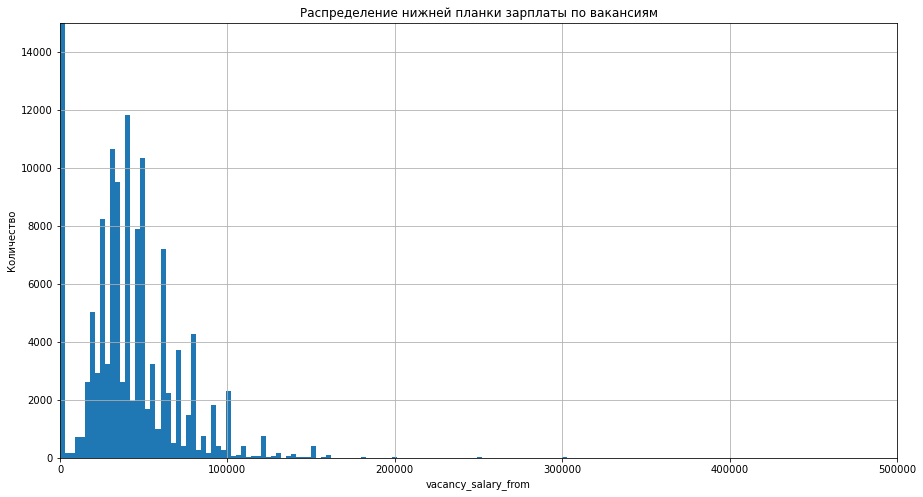

In [11]:
plt.figure(figsize=(15,8))
df['vacancy_salary_from'].plot(kind='hist', bins=300)
plt.title('Распределение нижней планки зарплаты по вакансиям')
plt.xlabel('vacancy_salary_from')
plt.ylabel('Количество')
plt.grid(axis = 'both')
plt.xlim(0,500000)
plt.ylim(0,15000)
plt.show()

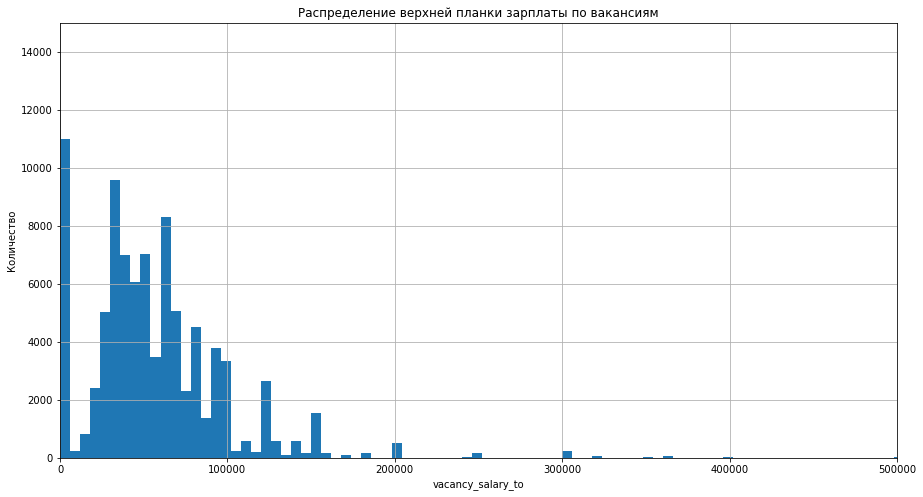

In [12]:
plt.figure(figsize=(15,8))
df['vacancy_salary_to'].plot(kind='hist', bins=500)
plt.title('Распределение верхней планки зарплаты по вакансиям')
plt.xlabel('vacancy_salary_to')
plt.ylabel('Количество')
plt.grid(axis = 'both')
plt.xlim(0,500000)
plt.ylim(0,15000)
plt.show()

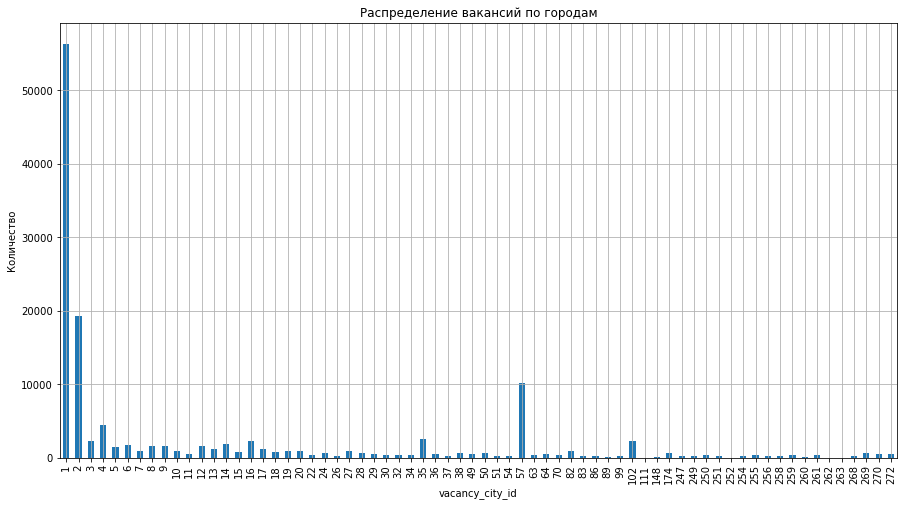

In [13]:
plt.figure(figsize=(15,8))
df.groupby('vacancy_city_id')['vacancy_city_id'].count().plot(kind='bar')
plt.title('Распределение вакансий по городам')
plt.xlabel('vacancy_city_id')
plt.ylabel('Количество')
plt.grid(axis = 'both')
plt.show()

In [14]:

df.describe()

,vacancy_id,vacancy_operating_schedule_id,vacancy_salary_from,vacancy_salary_to,vacancy_offer_education_id,vacancy_offer_experience_year_count,vacany_company_id,vacancy_city_id,vacancy_offer_experience_year_id
count,1.340000e+05,134000.000000,134000.000000,8.972900e+04,134000.000000,122464.000000,1.340000e+05,134000.000000,4554.000000
mean,4.251627e+07,2.856761,39664.434022,5.634255e+04,0.636119,-39.922459,1.314859e+06,23.691007,1.533597
std,2.284661e+06,2.190242,28533.797338,4.692792e+04,1.234421,49.773722,5.975650e+05,52.548467,1.579114
min,6.503425e+06,1.000000,-1.000000,-1.000000e+00,0.000000,-100.000000,3.300000e+01,1.000000,0.000000
25%,4.272692e+07,1.000000,24000.000000,3.000000e+04,0.000000,-100.000000,8.683300e+05,1.000000,0.000000
50%,4.325110e+07,2.000000,38000.000000,5.000000e+04,0.000000,-1.000000,1.507711e+06,2.000000,1.000000
75%,4.356918e+07,3.000000,52000.000000,7.500000e+04,1.000000,1.000000,1.720991e+06,18.000000,3.000000
max,4.391009e+07,7.000000,900000.000000,3.000000e+06,4.000000,10.000000,3.447641e+06,272.000000,5.000000


In [15]:
# Проверим все уникальные значения столбца 'vacancy_offer_experience_year_id'
df['vacancy_offer_experience_year_id'].unique()

array([ 0., nan,  2.,  5.,  1.,  3.,  4.])

In [16]:
# Проверим все уникальные значения столбца 'vacancy_offer_experience_year_count'
df['vacancy_offer_experience_year_count'].unique()

array([  nan,    2., -100.,   -1.,    1.,    0.,    3.,    4.,    5.,
          7.,    6.,   10.,    8.,    9.])

In [17]:
# Посмотрим соотношение значений для столбца
df['vacancy_offer_experience_year_count'].value_counts(normalize=True)

-100.0    0.406854
 1.0      0.223004
 3.0      0.112988
-1.0      0.108865
 2.0      0.056359
 0.0      0.054359
 5.0      0.029331
 4.0      0.003830
 10.0     0.001805
 6.0      0.001511
 7.0      0.000735
 8.0      0.000318
 9.0      0.000041
Name: vacancy_offer_experience_year_count, dtype: float64

In [18]:
# Посмотрим соотношение компаний и рекрутинговых агенств.
df['vacancy_is_agency'].value_counts(normalize=True)

False    0.880642
True     0.119358
Name: vacancy_is_agency, dtype: float64

In [19]:
# Посмотрим количество вариантов образования
df['vacancy_offer_education_id'].unique()

array([0, 4, 3, 2, 1], dtype=int64)

In [20]:
# Посмотрим на распределение по образованию
df['vacancy_offer_education_id'].value_counts(normalize=True)

0    0.741493
2    0.102933
4    0.087470
1    0.061970
3    0.006134
Name: vacancy_offer_education_id, dtype: float64

### Вывод по анализу данных

**Вывод по анализу данных:**

1. Таблица имеет 13 столбцов и 134000 строк.
2. 4 столбца имеют пропуски:
        vacancy_operating_schedule_comment	99.5%
        vacancy_offer_experience_year_id	96.6%
        vacancy_salary_to	33.0%
        vacancy_offer_experience_year_count 8.6%
2 из них имеют пропусков более 95%. Данные столбцы не информативны и незаполняются. Возможно их стоит убрать.
3. 6 столбцов имеют в составе id номера:
        vacancy_id
        vacancy_operating_schedule_id        
        vacancy_offer_education_id           
        vacany_company_id                    
        vacancy_city_id                      
        vacancy_offer_experience_year_id     
Это говорит о том, что данная таблица является частью базы данных, которая связана с другими таблицами по данным номерам. 
4. Cтолбец 'vacancy_offer_experience_year_id' имеет значения типа float (дробные числа), чего обычно не делается в базах данных и для id используются числа типа int (целые). При рассмотрении уникальных значений видно, что числа не имеют дробной части. Если это id, то необходимо заменить тип данных на int.
5. Данная таблица имеет 44964 полных дубликатов строк. Такого не должно быть в услових баз данных и для каждой записи должен быть свой уникальный vacancy_id. Данные дубликаты подлежат удалению
6. Столбец vacancy_salary_from заполнен полностью и не имеет пропусков, при этом скорей всего это является обязательным полем и, если работодатель не хочет указывать, то ставит ноль. А вот vacancy_salary_to уже имеет пропуски, причем доволно высокое количество - 33%. 
7. Распределения по зарплате говорит нам о том, что медиана по зарплате колеблется от 38000 до 50000
8. Распределение по городам говорит о том, что в городе с id=1 больше всего вакансий, далее идут id=2 и id=57. 
9. Столбец 'vacancy_offer_experience_year_count' имеет различные значения без дробной части. Возможно она не нужна и есть смысл заменить тип данных на int. Также есть данные -100 и -1, что наверное не соответствует действительности. Также этот столбец скорей всего может быть использован для пополнения столбца vacancy_offer_experience_year_id.
10. Столбец vacany_company_id в названии имеет ошибку, в слове 'vacany' не хватает буквы 'c'. Для предотвращения ошибок в будущем стоит исправить данную ошибку. 
11. Соотношение столбца 'vacancy_is_agency' говорит нам о том, что на платформе представлено всего 12% агенств, остальное - компании напрямую.

## Поля для поиска вакансий соискателями

-    vacancy_id - для внутреннего использования, не для соискателей.
-    vacancy_custom_position - название позиции, будет использоваться для поиска.
-    vacancy_operating_schedule_id - график работы. требует расшифровки. Для того, чтобы соискатель мог выбрать категорию, необходимо данные с расшифровкой значений совместить с представленными в таблице значениями. Для соискателя должна быть доступна возможность выбрать несколько категорий сразу. А столбец vacancy_operating_schedule_comment придется удалить, так как он заполнен только на 5%.
-    vacancy_salary_from, vacancy_salary_to - для соискателя формируют диапазон возможных зарплат и показывают, попадает ли желаемая зарплата в указанный для позиции диапазон. При этом, если поля в данных колонках не заполнены, то они должны принимать участие в поиске без ограничений.
-    vacancy_description - описание позиции будет использоваться для поиска соискателями по ключевым словам.
-    vacancy_offer_education_id - данные этой колонки могут использоваться при условия преобразования в бинарный вид (к примеру, вакансии, доступные для соискателей без высшего образования, или нет). В таком виде их можно включить в список параметров поиска для соискателя.
-    Данные из vacancy_offer_experience_year_count должны быть очищены и преобразованы в категории: к примеру, "без опыта", "опыт от 1 до 3 лет", "опыт от 3 лет", "не имеет значения". А вот последний столбец vacancy_offer_experience_year_id придется удалить, так как только 3% заполнено.
-    vacany_company_id - при возможности расшифровки данных и предоставления информации соискателю не в форме id, а по названию компании, данные необходимо включить в поиск. Соискатели могут интересоваться конкретными компаниями, а в идеале компании можно сгруппировать по отраслям и таким образом добавить в поиск новый столбец "сфера деятельности".
-    vacancy_is_agency - столбец позволяет просмотривать только вакансии от прямых работодателей, и поэтому необходим для поиска вакансий.
-    vacancy_city_id - индексы городов нужно расшифровать и дать возможность поиска по городам.

В итоге у нас есть 10 необходимых столбцов: 
1. vacancy_custom_position (название позиции), 
2. vacancy_operating_schedule_id (график работы, категории), 
3. vacancy_salary_from/vacancy_salary_to (одно поле поиска зарплаты для соискателя, куда можно ввести желаемый доход, и система сопоставит его с диапазоном зарплат на позициях), 
4. vacancy_description (описание вакансии), 
5. vacancy_offer_education_id (возможно использовать для исключения вакансий, 
6. требующих высшего образования), 
7. vacancy_offer_experience_year_count (опыт работы, преобразование в категории), 
8. vacany_company_id (название компании, плюс возможность добавления столбца "отрасль" в соответствии с деятельностью компаний), 
9. vacancy_is_agency (возможность исключения вакансий от агентств), 
10. vacancy_city_id (фильтрация вакансий по городам).

## План эксперимента по расчету релевантности выдачи поисковой системы

Можно сформулировать задачу следующим образом: имея запрос к поисковой системе и результат выдачи, найти коэффициент релевантности между ними, то есть насколько релевантен каждый результат выдачи по отношению к запросу. Затем обучить машину предсказывать коэффициент релевантность для каждой пары запрос-выдача. 

На начальном этапе мы извлечем несколько выдач для быстрой оценки релевантности. А на следующем этапе проведем более тщательную, но и затратную по времени проверку для переназначения коэффициентов релевантности.

К примеру, у нас есть 10 000 вакансий. И поисковый запрос: «аналитик данных». Самая простая модель может вывести по этому запросу результаты посредством оператора AND между словами запроса: «аналитик» и «данных». Допустим, это выведет 200 результатов. И затем, для этих 200 результатов, мы можем запустить более сложный алгоритм машинного обучения и посчитать коэффициент релевантности для каждой пары запрос-выдача. Такой подход называется Обучение ранжированию (MLR).

Вернемся к нашему примеру: с помощью оператора AND получено 200 результатов. Нужно оценить их релевантность. Для этого есть несколько способов:
-    мануальная оценка полученных результатов специально нанятыми людьми (как правило, одну и ту же пару запрос-вакансия оценивает минимум 3 человека, и в качестве итогового берется среднее значение);
-    оценка по количеству кликов (исходя из предположения, что пользователи будут открывать вакансии, которые оказались релевантны их поиску);
-    анализ цепочки запросов (где каждый следующий запрос является уточняющим);
-    использование специальных функций типа Google SearchWiki, где возможна сортировка результатов самим пользователем.

Такую работу можно провести по самым популярным запросам.
Далее из полученных результатов нужно сформировать таблицу, где в каждом ряду будут пары запрос-вакансия и коэффициент релевантности в выдаче (например, от 1 до 3, где 1 – нерелевантно, а 3 – идеальное совпадение). Скорее всего одна и та же вакансия будет фигурировать в нескольких рядах, в зависимости от количества запросов, в которых она будет появляться.

Это таблица – наши тренировочные данные.
А тестовые данные – все остальные запросы, коэффициент релевантности которых мы не знаем.


Далее на тренировочных данных обучить модель регрессии.
Необходимо уделить особое внимание подготовки полей с названием и описанием позиции путем очистки от лишних символов, проведением лематизации.

Кроме того, для расчета релевантности можно использовать уже готовые результаты таких поисковых систем как Elasticsearch, где релевантность оценивается путем определения частоты (term frequency) и обратной частоты (inverse document frequency(IDF)). Также система позволяет достроить релевантность поиска (например, самостоятельно установив вес различных полей в поиске).